In [33]:
!pip install -q ultralytics albumentations

In [11]:
import cv2
import matplotlib.pyplot as plt

from pathlib import Path
from ultralytics import YOLO

In [3]:
model = YOLO("/kaggle/input/yolo11m-word_detector/pytorch/default/1/best.pt")

In [5]:
train_config = {
    "data": "/kaggle/input/worddetector/data.yaml", # paste your YAML config
    "batch": 8,
    "epochs": 100,
    "patience": 20,
    "lr0": 1e-4,
    "optimizer": "AdamW",
    "cos_lr": True,
    "dropout": 0.1,
    "device": 0,
    "exist_ok": True
}

In [4]:
fine_tune_config = {
    "data": "/kaggle/input/custom-dialectic-real-yolo/data.yaml", # paste your YAML config
    "batch": 8,
    "epochs": 50,
    "patience": 10,
    "lr0": 1e-4,
    "optimizer": "AdamW",
    "cos_lr": True,
    "warmup_epochs": 5,
    "close_mosaic": 5,
    "freeze": 10,
    "device": 0,
    "exist_ok": True
}

In [8]:
model.train(**fine_tune_config) # paste the config (train or fine-tine)

In [12]:
p = Path("/kaggle/input/custom-dialectic-real-yolo/val/images") # paste a path with photos for testing
imgs = []

for file in p.rglob("*"):
    imgs.append(cv2.imread(file))

In [13]:
# Load a trained detection models
model_detection = YOLO('/kaggle/input/yolo11m-dialectic/pytorch/default/1/best.pt')
result_real = model_detection.predict(source=imgs, conf=0.3)

model_detection = YOLO('/kaggle/input/yolo11m-word_detector/pytorch/default/1/best.pt')
result_m = model_detection.predict(source=imgs, conf=0.3)



0: 640x640 21 texts, 13.9ms
1: 640x640 14 texts, 13.9ms
2: 640x640 41 texts, 13.9ms
3: 640x640 28 texts, 13.9ms
4: 640x640 3 texts, 13.9ms
5: 640x640 23 texts, 13.9ms
6: 640x640 23 texts, 13.9ms
7: 640x640 14 texts, 13.9ms
8: 640x640 17 texts, 13.9ms
9: 640x640 18 texts, 13.9ms
Speed: 2.9ms preprocess, 13.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 24 texts, 12.5ms
1: 640x640 15 texts, 12.5ms
2: 640x640 44 texts, 12.5ms
3: 640x640 30 texts, 12.5ms
4: 640x640 3 texts, 12.5ms
5: 640x640 25 texts, 12.5ms
6: 640x640 25 texts, 12.5ms
7: 640x640 15 texts, 12.5ms
8: 640x640 22 texts, 12.5ms
9: 640x640 18 texts, 12.5ms
Speed: 2.7ms preprocess, 12.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [36]:
def yolo_test(result, imgs, i=0, fig=None, ax=None):        
    out_img = cv2.cvtColor(imgs[i].copy(), cv2.COLOR_BGR2RGB)
    for data in result[i].boxes.data.tolist():        
        xmin, ymin, xmax, ymax, _, _ = map(int, data)        
    
        cv2.rectangle(out_img, (xmin, ymin), (xmax, ymax), color=(0, 0, 255), thickness=1)
    
    if fig:
        ax.imshow(out_img)
    else:
        plt.imshow(out_img)
        plt.show()
            

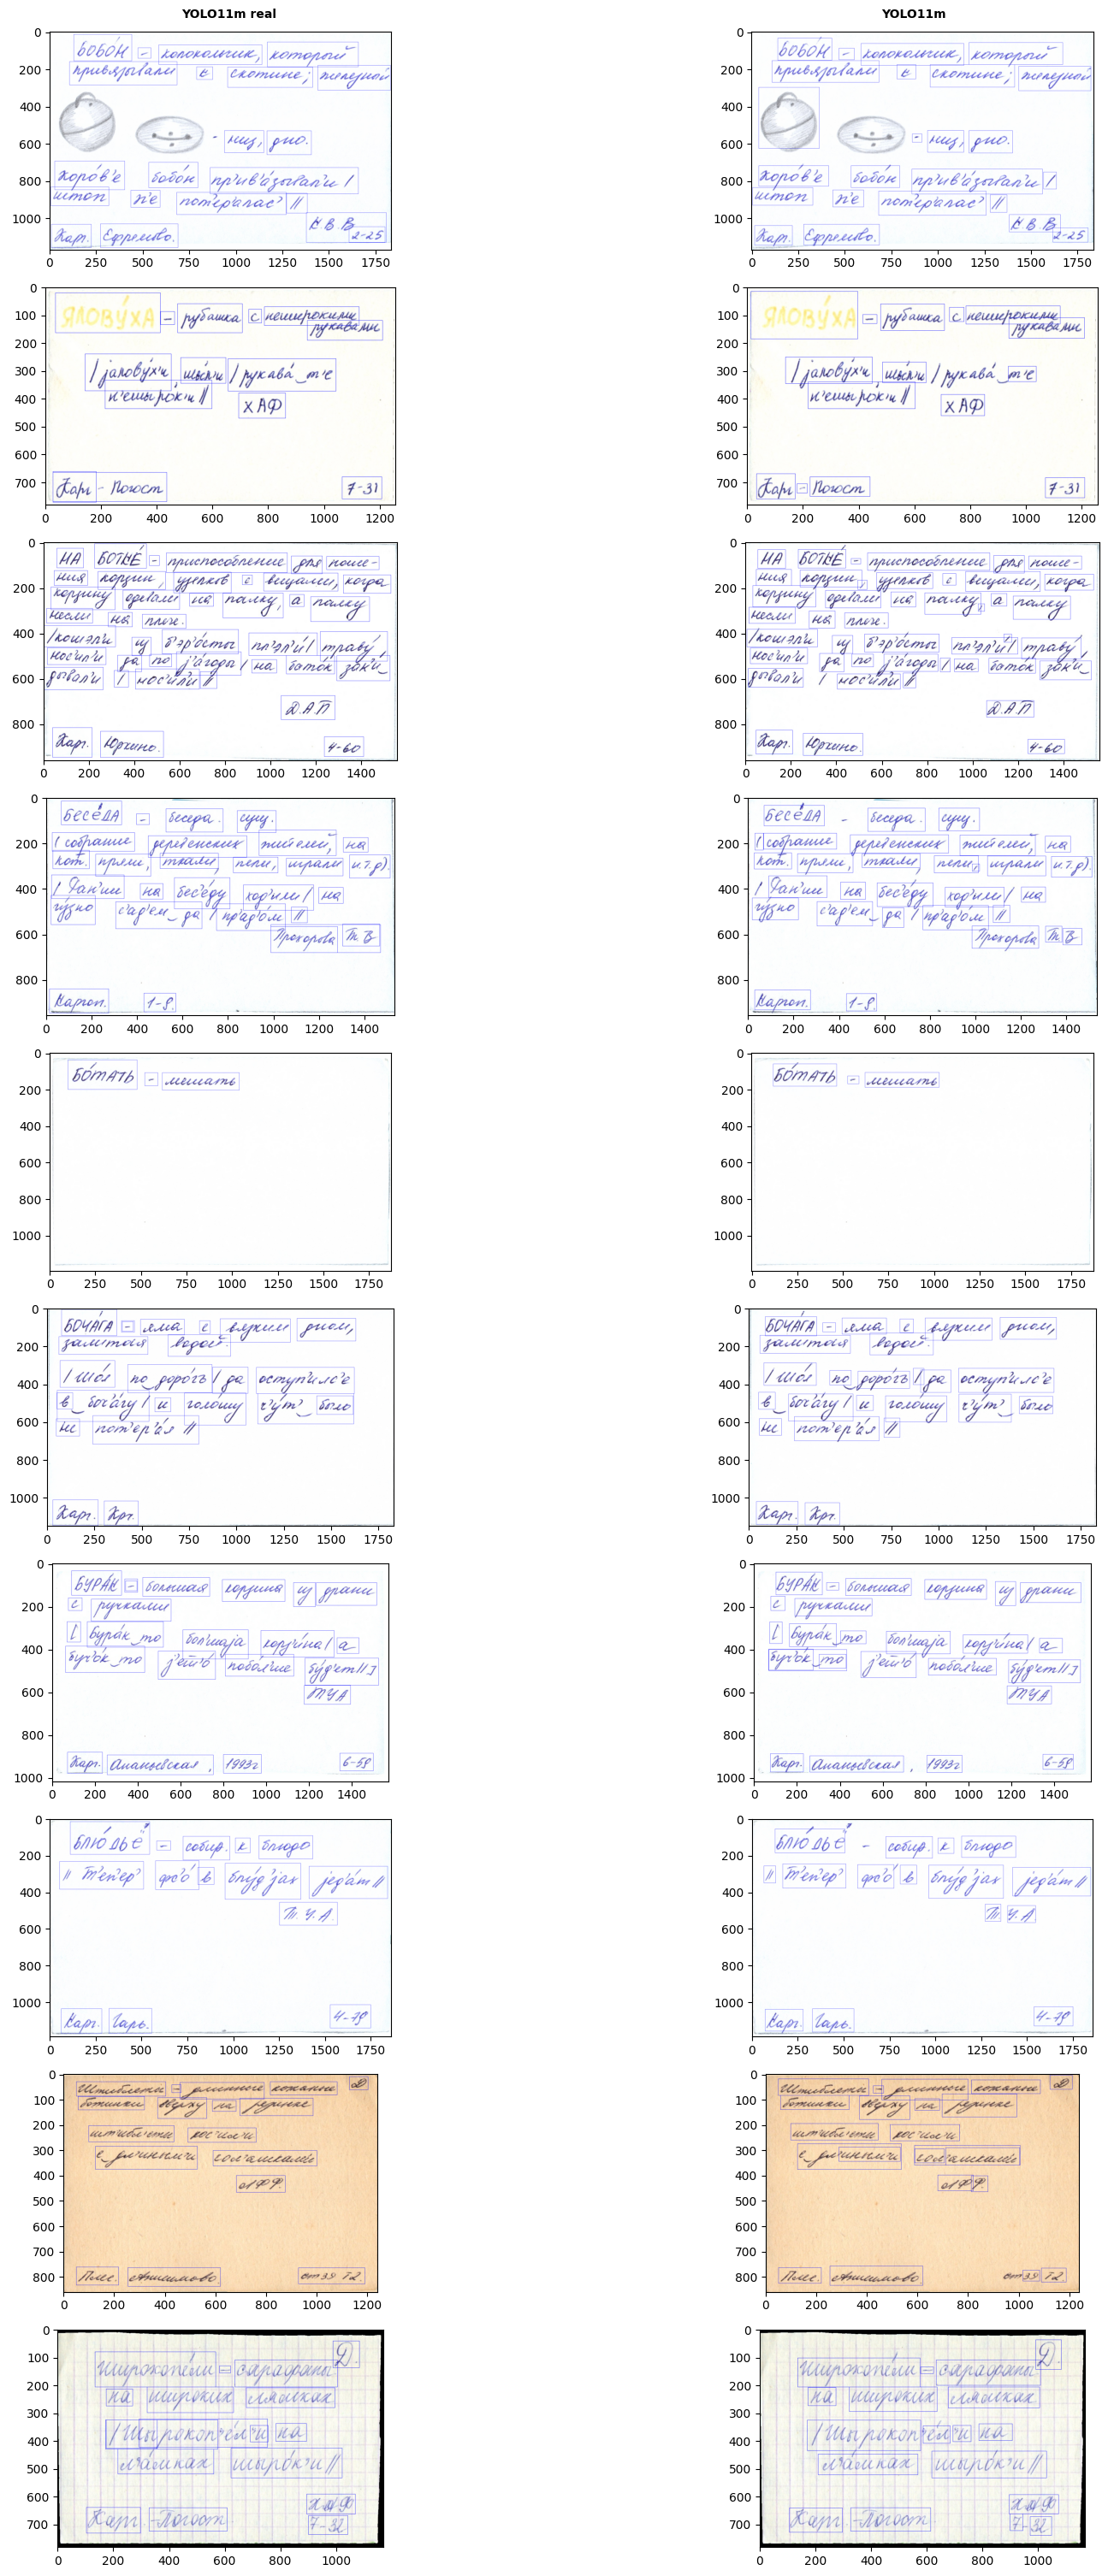

In [37]:
length = len(result_m)
fig, axes = plt.subplots(length, 2, figsize=(20, 30))
fig.text(0.3, 1.0, 'YOLO11m real', ha='center', va='center', fontsize=10, fontweight='bold')
fig.text(0.7, 1.0, 'YOLO11m', ha='center', va='center', fontsize=10, fontweight='bold')

for i in range(length):
    yolo_test(result_real, imgs, i, fig, axes[i, 0])

for i in range(length):
    yolo_test(result_m, imgs, i, fig, axes[i, 1])

plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
import zipfile


def create_zip(folder_to_zip, zip_path):
    base_name = zip_path[:-4]
    shutil.make_archive(base_name=base_name, format='zip', root_dir=folder_to_zip)
    folder_name = os.path.basename(folder_to_zip)
    print(f"Zip archive of the {folder_name} created")


zip_path = '/kaggle/working/yolo11m-real-yolo.zip'
folder_to_zip = '/kaggle/working/runs'

if os.path.exists(zip_path):
    os.remove(zip_path)

create_zip(folder_to_zip, zip_path)